# Quadratic Number Fields

An [OSCAR](https://www.oscar-system.org) course notebook by [Ulrich Thiel](https://ulthiel.com/math), following lecture notes by [Tommy Hofmann](https://www.thofma.com/) from 2017.

In [1]:
using Oscar

 -----    -----    -----      -      -----   
|     |  |     |  |     |    | |    |     |  
|     |  |        |         |   |   |     |  
|     |   -----   |        |     |  |-----   
|     |        |  |        |-----|  |   |    
|     |  |     |  |     |  |     |  |    |   
 -----    -----    -----   -     -  -     -  

...combining (and extending) ANTIC, GAP, Polymake and Singular
Version 0.12.0-DEV ... 
 ... which comes with absolutely no warranty whatsoever
Type: '?Oscar' for more information
(c) 2019-2023 by The OSCAR Development Team


## Lecture 1: Introduction and first steps

### Example: Integral solutions of $x^3 = y^2 + 2$

In the example Question (v) we studied the integral solutions of the equation $x^3 = y^2 + 2$ and "proved" that the only solutions are $(x,y) = (3,\pm 5)$. In general, the solutions of a polynomial equation involving two variables define what is called a *plane algebraic curve*. Our example is an example of an *elliptic curve*. We can draw it as follows.

In [3]:
import ImplicitPlots, Plots

In [13]:
f(x,y) = x^3 - y^2 - 2;

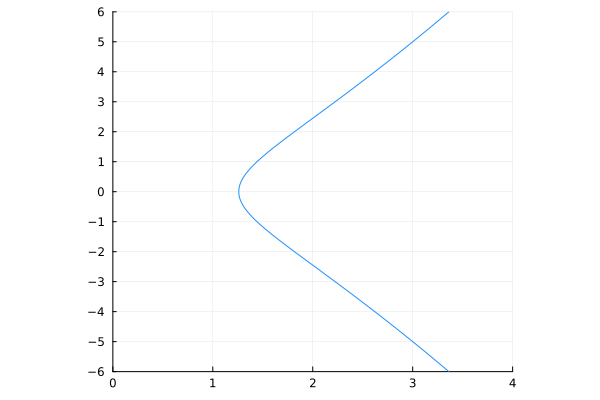

In [6]:
ImplicitPlots.implicit_plot(f; xlims=(0,4), ylims=(-6,6), xticks=0:1:4, yticks=-6:1:6, legend=false, aspect_ratio = 0.3)

### Basics of quadratic fields

You can create a quadratic number field $K = \mathbb{Q}(\sqrt{d})$ as follows:

In [13]:
d = 2;
K, θ = quadratic_field(d)

(Real quadratic field defined by x^2 - 2, sqrt(2))

The return value is a pair of the field $K$ itself and an element, here denoted $\theta$, such that $\theta^2 = d$.

In [14]:
θ^2

2

In [15]:
basis(K)

2-element Vector{nf_elem}:
 1
 sqrt(2)

In [18]:
α = 2 + 3*θ

3*sqrt(2) + 2

In [19]:
trace(α)

4

In [20]:
norm(α)

-14

In [21]:
charpoly(α)

x^2 - 4*x - 14

In [22]:
minpoly(α)

x^2 - 4*x - 14

In [23]:
𝒪 = maximal_order(K)

Maximal order of Real quadratic field defined by x^2 - 2 
with basis nf_elem[1, sqrt(2)]

In order to have several examples of quadratic fields and their ring of integers at hand, we create a dictionary of data indexed by $d$.

In [4]:
K = Dict(d => quadratic_field(d)[1] for d in [-5, -3, -1, 2, 5]);

In [5]:
θ = Dict(d => gen(K[d]) for d in keys(K));

In [6]:
𝒪 = Dict(d => maximal_order(K[d]) for d in keys(K));

In [7]:
𝒪[5]

Maximal order of Real quadratic field defined by x^2 - 5 
with basis nf_elem[1, 1//2*sqrt(5) + 1//2]

BoundsError: BoundsError: attempt to access 38-codeunit String at index [1:40]

BoundsError: BoundsError: attempt to access 38-codeunit String at index [1:40]

BoundsError: BoundsError: attempt to access 38-codeunit String at index [1:40]

## Lecture 2: Units and fun with ideals

### Units

We can determine the unit group of the ring of integers as follows:

In [54]:
U, f = unit_group(𝒪[-1])

(GrpAb: Z/4, UnitGroup map of Maximal order of Imaginary quadratic field defined by x^2 + 1 
with basis nf_elem[1, sqrt(-1)]
)

The return value is a pair of an (abstract) abelian group $U$ and an isomorphism $f \colon U \to \mathscr{O}^\times$. We can get all the units as follows:

In [68]:
[f(u) for u in U]

4-element Vector{NfOrdElem}:
 1
 -sqrt(-1)
 -1
 sqrt(-1)

Let's do the same also for $d=-3,-5$.

In [69]:
U,f = unit_group(𝒪[-3])

(GrpAb: Z/6, UnitGroup map of Maximal order of Imaginary quadratic field defined by x^2 + 3 
with basis nf_elem[1, 1//2*sqrt(-3) + 1//2]
)

In [70]:
[f(u) for u in U]

6-element Vector{NfOrdElem}:
 1
 1//2*sqrt(-3) + 1//2
 1//2*sqrt(-3) - 1//2
 -1
 -1//2*sqrt(-3) - 1//2
 -1//2*sqrt(-3) + 1//2

In [71]:
U,f = unit_group(𝒪[-5])

(GrpAb: Z/2, UnitGroup map of Maximal order of Imaginary quadratic field defined by x^2 + 5 
with basis nf_elem[1, sqrt(-5)]
)

In [72]:
[f(u) for u in U]

2-element Vector{NfOrdElem}:
 1
 -1

The example for $d=2$ shows that units in real quadratic fields are more complicated (we'll come to this later):

In [73]:
U,f = unit_group(𝒪[2])

(GrpAb: Z/2 x Z, UnitGroup map of Maximal order of Real quadratic field defined by x^2 - 2 
with basis nf_elem[1, sqrt(2)]
)

In [76]:
f(U[1]), f(U[2])

(-1, sqrt(2) - 1)

In [77]:
inv( f(U[2]) )

sqrt(2) + 1

Note that powers of $-1 + \sqrt{2}$ are units as well and that this element is of infinite order, giving infinitely many distinct units.

### Ideals

We can create an ideal in the ring of integers as follows:

In [41]:
A₂ = ideal(𝒪[-5], 2, 1+𝒪[-5](θ[-5]))

<2, sqrt(-5) + 1>

This is the ideal $( 2, 1+\sqrt{-5} )$ in the ring $\mathbb{Z} \lbrack -5 \rbrack$. The ideal constructor expects elements from the ring as generators. By construction, ```θ[-5]``` is considered by the computer as an element of the field ```K[-5]```. Hence, we need to tell the computer to consider it as an element of $\mathbb{Z} \lbrack -5 \rbrack$. This is what the ```𝒪[-5](θ[-5])``` is doing. No mathematics is happening here, the computer is just very strict.

It is a fact that any ideal can be generated by (at most) *two* elements, and the convention here is that the first generator is the norm of the ideal (recall that the norm is always contained in the ideal).

In [10]:
is_principal(A₂)

(false, 1)

In [43]:
A₂′ = ideal(𝒪[-5], 2, 1-𝒪[-5](θ[-5])); A₃ = ideal(𝒪[-5], 3, 1+𝒪[-5](θ[-5])); A₃′ = ideal(𝒪[-5], 3, 1-𝒪[-5](θ[-5]));

We can do arithmetic with ideals:

In [44]:
(A₂ * A₂′) * (A₃ * A₃′)

<36, 7350>
Norm: 36
two normal wrt: 36

Both generators are integral, so the ideal can be generated by a single element, namely the gcd of the generators:

In [18]:
gcd(36, 7350)

6

Let's check:

In [45]:
ideal(𝒪[-5], 6) == (A₂ * A₂′) * (A₃ * A₃′)

true

## Lecture 3: Unique factorization into prime ideals

In [46]:
A = ideal(𝒪[-5], -55 + 187*𝒪[-5](θ[-5]))

<177870, 187*sqrt(-5) - 55>
Norm: 177870
principal generator 187*sqrt(-5) - 55
two normal wrt: 177870

In [47]:
is_prime(A)

false

In [49]:
norm(A)

177870

In [50]:
factor(A)

Dict{NfOrdIdl, Int64} with 5 entries:
  <2, sqrt(-5) + 1> => 1
  <11, 11>          => 1
  <3, sqrt(-5) + 5> => 1
  <5, sqrt(-5)>     => 1
  <7, sqrt(-5) + 3> => 2